### Définition du problème :

1. **Univers d’investissement et indices**

    - Un univers d’investissement composé de 100 valeurs

    - Des indices constitués de ces 100 valeurs

        - I1 : 100 valeurs équipondérées (1% chacune)
        - I2 : 5 valeurs valent chacune 10% et les 95 autres sont équipondérées pour représenter 50%
        - I3 : 1 valeur vaut 50% et les 99 autres sont équipondérées pour représenter 50%

2. **Une méthode d’investissement de génération d’alpha**

    - Une méthode de détection de momentum (hausse / flat / baisse) avec une probabilité d’occurrence de 60%

3. **Constitution d’un portefeuille de 30 valeurs**

**Question 1** : Quelle est, avec cette méthode d’investissement de génération d’alpha,  la ou les constitutions de portefeuille optimales pour battre sur le long terme l’indice I1 ? l’indice I2 ? l’indice I3 ?

**Question 2** : Trouver une méthode générique en fonction des allocations de l’indice de référence à battre





## 1. Indice 1, équipondéré :

- $(N_{indice})$ : Nombre total d'actions dans l'indice
- $(N_{portefeuille})$ : Nombre total d'actions dans le portefeuille
- $(p_h)$ : Probabilité de hausse.
- $(p_{pc})$ : Probabilité de prédiction correcte.
- $(r)$ : Rendement (Pour simplifier nos calculs, ici on va dire qu'une hausse vaut $r$ et une baisse $-r$).

Les valeurs correspondantes utilisés dans l'exercice sont les suivantes :

- $N_{indice} = 100$ 
- $N_{portefeuille} = 30$
- $p_h = 0.5$ 
- $p_{pc} = 0.6$ 
- $r = 1$

### Calcul de Probabilité :

La probabilité du nombre de rendements prédits haussiers est donnée par la formule :

$$ p_h \times p_{pc} + (1 - p_h) \times (1 - p_{pc}) $$

Cela représente la somme des rendements haussiers correctement prédits et des rendements baissiers incorrectement prédits.

### Espérance de Bonne Prédiction :

Pour déterminer la probabilité d'avoir une prédiction correcte dans notre lot de rendements prédits haussiers, nous utilisons la formule :
$$ p_{pc|rh} = \frac{p_h \times p_{pc}}{p_h \times p_{pc} + (1 - p_h) \times (1 - p_{pc})} $$
$$= \frac{p_h \times p_{pc}}{2 \times p_h \times p_{pc} + 1 - p_h - p_{pc}} $$

Cela signifie que lorsque nous prenons un échantillon de $N_{portefeuille}$ prédictions, nous sommes soumis à la probabilité $(p_{pc|rh})$ que notre prédiction soit correcte. Ainsi, nous aurons en moyenne $(N_{portefeuille} \times p_{pc|rh})$ bonnes prédictions dans notre portefeuille.

### Comparaison des Probabilités :

L'Espérance de rendement de nos $N_{portefeuille}$ actions, soit $E(R_{portefeuille})$, correspond à la comparaison des probabilités d'avoir $N_{portefeuille}$ bonnes prédictions contre $N_{portefeuille}$ mauvaises prédictions. Cela est représentée par les formules :


$$E(R_{portefeuille}) = \left( \left( \frac{p_h \times p_{pc}}{p_h \times p_{pc} + (1 - p_h) \times (1 - p_{pc})} \right) \cdot r_h + \left( \frac{(1 - p_h) \times (1 - p_{pc})}{p_h \times p_{pc} + (1 - p_h) \times (1 - p_{pc})} \right) \cdot r_b \right) \cdot \frac{1}{N_{portefeuille}} \times N_{portefeuille}$$

$$E(R_{portefeuille}) = (p_{pc|rh} \times r_h + (1 - p_{pc|rh}) \times r_b)\cdot \frac{1}{N_{portefeuille}} \times N_{portefeuille}$$

il est important de rappeler que ici $\frac{1}{N_{portefeuille}} \times N_{portefeuille} = 1$, mais cette partie du calcul est importante pour déterminer la variance ultérieurement

il s'agit là donc de l'espérance pour le portefeuille qui tente de battre l'indice 1, c'est à dire si nous n'avons aucune autre information que celles fournies initialement, et que les poids dans l'indice sont égaux.

Il est important de noter que cela implique que la pondération dans notre portefeuille soit également équipondéré. L'équipondération signifie que chaque action sélectionnée a le même poids dans le portefeuille. Cela est raisonnable si on n'a pas d'information supplémentaire qui justifierait un poids différent selon l'action. L'équipondération réduit la variance du portefeuille en diversifiant le risque spécifique à chaque action.

En combinant ces éléments, on peut justifier la création d'un portefeuille de .$N_{portefeuille}$ actions prédites haussières comme suit : en utilisant notre pouvoir de prédiction $p_{pc}$, et la probabilité connue de hausse $p_h$, nous sélectionnons les actions qui ont la plus grande probabilité de rendement positif pour maximiser l'espérance de rendement global du portefeuille, tout en gérant le risque à travers l'équipondération.





In [12]:
#########################################################
# Module de simulation de d'une poche d'actions équipondérés
#########################################################

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Définition des paramètres initiaux
exposition_indice = 1 # Exposition de la poche équipondérée à l'indice (utile ultérieurement)
N_indice = 100
N_ptf = 30
w_indice = exposition_indice/1/N_indice
w_ptf = exposition_indice/1/N_ptf

# Définition des paramètres de la simulation
ph = 0.5 # Probabilité de hausse
ppc = 0.6 # Probabilité de prédiction correcte
rh = 1 # Rendement en cas de hausse
rb = -1 # Rendement en cas de baisse

# Affichage des paramètres
print("\nExposition indice : {:.2%}".format(exposition_indice))
print("Nombre d'actions dans l'indice : ",N_indice)
print("Nombre d'actions dans le portefeuille : ",N_ptf)
print("Poids d'une action dans l'indice : {:.2f}".format(w_indice))
print("Poids d'une action dans le portefeuille : {:.2f}".format(w_ptf))


# Génération aléatoire des rendements des actions
returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])

print("\n        Returns : ",returns)

# Calcul du momentum des actions
actions_momentum = np.where(returns == rh, 1, 0)

print("       Momentum : ",actions_momentum)

# Définition des probabilités de prédiction
probas = [ppc, (1 - ppc)]  # 60% de chances de prédire correctement, 40% de chances de prédire l'autre

# Prédiction du momentum des actions
actions_momentum_pred = np.where(actions_momentum == 1, 
                                 np.random.choice([1, 0], size=N_indice, p=probas), 
                                 np.random.choice([0, 1], size=N_indice, p=probas))

print("Momentum prédis : ",actions_momentum_pred)

#On créer une identité à chaque action pour pouvoir les identifier leur rendement et leur momentum
actions = np.arange(N_indice)

#On créer un dataframe pour stocker les informations des actions de l'indice
df_indice = pd.DataFrame({'Actions':actions,'Returns':returns,'Momentum':actions_momentum,'Momentum_pred':actions_momentum_pred, 'Poids':w_indice})

#Calcul du rendement de l'indice
indice_return = np.sum(df_indice['Returns'] * df_indice['Poids'])

print("\nRendement indice : ",indice_return)

# On créer un dataframe pour stocker N_ptf actions de l'indice qui on Momentum_pred=1. Le but de l'ascending est de pouvoir prendre toujours N_ptf, 
# même si on a prédit moins de N_ptf actions avec un momentum positif (C'est statistiquement faible, mais possible)
df_ptf = df_indice.sort_values(by='Momentum_pred',ascending=False).head(N_ptf)
df_ptf['Poids'] = w_ptf

#Calcul du rendement du portefeuille
ptf_return = np.sum(df_ptf['Returns'] * df_ptf['Poids'])

print("\nRendement portefeuille : ",ptf_return)

#Calcul du delta de rendement
delta_return = ptf_return - indice_return

print("\nDelta rendement : ",delta_return)


Exposition indice : 100.00%
Nombre d'actions dans l'indice :  100
Nombre d'actions dans le portefeuille :  30
Poids d'une action dans l'indice : 0.01
Poids d'une action dans le portefeuille : 0.03

        Returns :  [ 1  1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1
  1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1
  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1
 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1
 -1  1 -1 -1]
       Momentum :  [1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0]
Momentum prédis :  [0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1]

Rendement indice :  0.0399999

In [7]:
df_indice.sort_values(by='Momentum_pred',ascending=False).head(N_ptf)

,Actions,Returns,Momentum,Momentum_pred,Poids
50,50,1,1,1,0.01
76,76,1,1,1,0.01
24,24,-1,0,1,0.01
25,25,1,1,1,0.01
26,26,-1,0,1,0.01
85,85,-1,0,1,0.01
84,84,1,1,1,0.01
32,32,-1,0,1,0.01
33,33,1,1,1,0.01
38,38,-1,0,1,0.01


In [14]:
#########################################################
# Simulation de 10000 poches d'actions équipondérés
#########################################################

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Définition des paramètres initiaux
exposition_indice = 1 # Exposition de la poche équipondérée à l'indice (utile ultérieurement)
N_indice = 100
N_ptf = 30
w_indice = exposition_indice/1/N_indice
w_ptf = exposition_indice/1/N_ptf

# Définition des paramètres de la simulation
ph = 0.5 # Probabilité de hausse
ppc = 0.6 # Probabilité de prédiction correcte
rh = 1 # Rendement en cas de hausse
rb = -1 # Rendement en cas de baisse

# Liste pour stocker les rendements des indices
indice_returns = []

# Liste pour stocker les rendements des portefeuilles
ptf_returns = []

# Simulation de 10000 portefeuilles
for _ in range(10000):
    # Génération aléatoire des rendements des actions
    returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])

    # Calcul du momentum des actions
    actions_momentum = np.where(returns > 0.00, 1, 0)

    # Définition des probabilités de prédiction
    probas = [ppc, (1 - ppc)]  # 60% de chances de prédire correctement, 40% de chances de prédire l'autre

    # Prédiction du momentum des actions
    actions_momentum_pred = np.where(actions_momentum == 1, 
                                     np.random.choice([1, 0], size=N_indice, p=probas), 
                                     np.random.choice([0, 1], size=N_indice, p=probas))

    #On créer une identité à chaque action pour pouvoir les identifier leur rendement et leur momentum
    actions = np.arange(N_indice)

    #On créer un dataframe pour stocker les informations des actions de l'indice
    df_indice = pd.DataFrame({'Actions':actions,'Returns':returns,'Momentum':actions_momentum,'Momentum_pred':actions_momentum_pred, 'Poids':w_indice})

    #Calcul du rendement de l'indice
    indice_return = np.sum(df_indice['Returns'] * df_indice['Poids'])

    # Ajout du rendement de l'indice à la liste
    indice_returns.append(indice_return)

    # On créer un dataframe pour stocker N_ptf actions de l'indice qui on Momentum_pred=1. Le but de l'ascending est de pouvoir prendre toujours N_ptf, 
    # même si on a prédit moins de N_ptf actions avec un momentum positif (C'est statistiquement faible, mais possible)
    df_ptf = df_indice.sort_values(by='Momentum_pred',ascending=False).head(N_ptf)
    df_ptf['Poids'] = w_ptf

    #Calcul du rendement du portefeuille
    ptf_return = np.sum(df_ptf['Returns'] * df_ptf['Poids'])

    # Ajout du rendement du portefeuille à la liste
    ptf_returns.append(ptf_return)

# Calcul et affichage de la moyenne des rendements de l'indice
print("Moyenne des rendements de l'indice : ", np.mean(indice_returns))

# Calcul et affichage de la moyenne des rendements du portefeuille
print("\nMoyenne des rendements du portefeuille : ", np.mean(ptf_returns))
print("Espérance des rendements du portefeuille : ", (((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb) * 1/N_ptf  * N_ptf)

print("\nVariances des rendements du portefeuille : ", np.var(ptf_returns))

# Nouvelle Espérance E(X) en tenant compte de toutes les possibilités
E_X_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh  # Correct prediction outcomes
E_X_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb  # Incorrect prediction outcomes
E_X_total = E_X_correct + E_X_incorrect

# Nouvelle Variance Var(X) en tenant compte de toutes les possibilités
# La variance doit être recalculée correctement en fonction de la nouvelle espérance totale
Var_X_total = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_total) ** 2)

Var_R_portefeuille = Var_X_total / N_ptf 

print("Variance théorique des rendements du portefeuille : ", (Var_R_portefeuille))


# Calcul et affichage de la moyenne des deltas de rendements
print("\nMoyenne des deltas de rendements : ", np.mean(ptf_returns) - np.mean(indice_returns))

print()

Moyenne des rendements de l'indice :  -0.0013039999999999998

Moyenne des rendements du portefeuille :  0.1995
Espérance des rendements du portefeuille :  0.19999999999999996

Variances des rendements du portefeuille :  0.03153619444444444
Variance théorique des rendements du portefeuille :  0.032

Moyenne des deltas de rendements :  0.200804



In [13]:

N_portefeuille = N_ptf  # Nombre d'actions dans le portefeuille

# Calcul de l'espérance de rendement d'une action correctement prédite
E_R = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb

# Calcul de la variance du rendement d'une action
# La variance se base sur le rendement attendu (hausse ou baisse) et sa probabilité
Var_R_hausse_pc = (ph)* (rh - E_R)**2  # Variance pour une hausse prédite correctement
Var_R_baisse_pc = (1 - ph) * (rb - E_R)**2  # Variance pour une baisse prédite incorrectement


# Variance totale pour une action, tenant compte des deux issues possibles
Var_R = Var_R_hausse_pc + Var_R_baisse_pc 
# Calcul de la variance du portefeuille pour N actions équipondérées, sans prendre en compte la corrélation
Var_R_portefeuille = Var_R / N_ptf 

Var_R_portefeuille

# Ecrit toute la formule de la variance du portefeuille sur une ligne
#(ppc * (rh - (((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb))**2 + (1 - ppc) * (rb - (((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb))**2) / N_ptf


0.05466666666666667

In [17]:
# Nouvelle Espérance E(X) en tenant compte de toutes les possibilités
E_X_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh  # Correct prediction outcomes
E_X_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb  # Incorrect prediction outcomes
E_X_total = E_X_correct + E_X_incorrect

# Nouvelle Variance Var(X) en tenant compte de toutes les possibilités
# La variance doit être recalculée correctement en fonction de la nouvelle espérance totale
Var_X_total = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_total) ** 2)

Var_R_portefeuille = Var_X_total / N_ptf 

Var_R_portefeuille


0.045

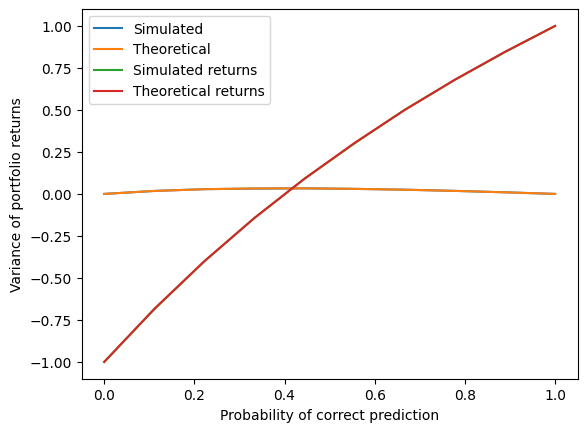

In [48]:
###########################################################
# Module de test pour être sûr que la théorie est correcte
###########################################################


import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres initiaux
exposition_indice = 1 # Exposition de la poche équipondérée à l'indice (utile ultérieurement)
N_indice = 100
N_ptf = 30
w_indice = exposition_indice/1/N_indice
w_ptf = exposition_indice/1/N_ptf

# Définition des paramètres de la simulation
ph = 0.5 # Probabilité de hausse
ppc = 0.6 # Probabilité de prédiction correcte
rh = 1 # Rendement en cas de hausse
rb = -1 # Rendement en cas de baisse

def calculate_variance(ph):
    # Importation des bibliothèques nécessaires
    import pandas as pd
    import numpy as np

    # Liste pour stocker les rendements des indices
    indice_returns = []

    # Liste pour stocker les rendements des portefeuilles
    ptf_returns = []

    # Simulation de 10000 portefeuilles
    for _ in range(10000):
        # Génération aléatoire des rendements des actions
        returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])

        # Calcul du momentum des actions
        actions_momentum = np.where(returns > 0.00, 1, 0)

        # Définition des probabilités de prédiction
        probas = [ppc, (1 - ppc)]  # 60% de chances de prédire correctement, 40% de chances de prédire l'autre

        # Prédiction du momentum des actions
        actions_momentum_pred = np.where(actions_momentum == 1, 
                                        np.random.choice([1, 0], size=N_indice, p=probas), 
                                        np.random.choice([0, 1], size=N_indice, p=probas))

        #On créer une identité à chaque action pour pouvoir les identifier leur rendement et leur momentum
        actions = np.arange(N_indice)

        #On créer un dataframe pour stocker les informations des actions de l'indice
        df_indice = pd.DataFrame({'Actions':actions,'Returns':returns,'Momentum':actions_momentum,'Momentum_pred':actions_momentum_pred, 'Poids':w_indice})

        #Calcul du rendement de l'indice
        indice_return = np.sum(df_indice['Returns'] * df_indice['Poids'])

        # Ajout du rendement de l'indice à la liste
        indice_returns.append(indice_return)

        # On créer un dataframe pour stocker N_ptf actions de l'indice qui on Momentum_pred=1. Le but de l'ascending est de pouvoir prendre toujours N_ptf, 
        # même si on a prédit moins de N_ptf actions avec un momentum positif (C'est statistiquement faible, mais possible)
        df_ptf = df_indice.sort_values(by='Momentum_pred',ascending=False).head(N_ptf)
        df_ptf['Poids'] = w_ptf

        #Calcul du rendement du portefeuille
        ptf_return = np.sum(df_ptf['Returns'] * df_ptf['Poids'])

        # Ajout du rendement du portefeuille à la liste
        ptf_returns.append(ptf_return)
    
    return np.var(ptf_returns), np.mean(ptf_returns)


# Define a range of ppc values to test
ppc_values = np.linspace(0, 1, 10)

# Initialize an empty list to store the variances
variances_sim = []
variances_theo = []
returns_sim = []
returns_theo = []
# For each ppc value, calculate the variance and append it to the list
for ph in ppc_values:
    
    # Calculate the variance for this ppc value
    variance, returns = calculate_variance(ph)  # replace this with your variance calculation
    variances_sim.append(variance)

    # Nouvelle Espérance E(X) en tenant compte de toutes les possibilités
    E_X_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh  # Correct prediction outcomes
    E_X_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb  # Incorrect prediction outcomes
    E_X_total = E_X_correct + E_X_incorrect

    # Nouvelle Variance Var(X) en tenant compte de toutes les possibilités
    # La variance doit être recalculée correctement en fonction de la nouvelle espérance totale
    Var_X_total = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_total) ** 2)

    Var_R_portefeuille = Var_X_total / N_ptf 

    Var_R_portefeuille


    variances_theo.append(Var_R_portefeuille)


    returns_sim.append(returns)
    returns_theo.append(E_X_total)

# Plot the variances as a function of ppc
plt.plot(ppc_values, variances_sim, label='Simulated')
plt.plot(ppc_values, variances_theo, label='Theoretical')
plt.plot(ppc_values, returns_sim, label='Simulated returns')
plt.plot(ppc_values, returns_theo, label='Theoretical returns')

plt.xlabel('Probability of correct prediction')
plt.ylabel('Variance of portfolio returns')
plt.legend()
plt.show()

## Indice 2 et 3, introduction des "Big Cap" :

### Définition des "Big Cap" :

Dans l'indice 2 et 3, on introduit des valeurs qui sont surpondérés dans l'indice, on va les appeler les "Big Cap", ce qui signifie grande capitalisation boursière (ce qui explique généralement la surpondération d'une action dans un indice). C'est à dire qu'elles ont une pondération définit $w$, et il peut y en avoir $n_{Big Cap}$.

Dans le cas de l'indice 2, l'énoncé nous donne 5 valeurs qui ont une pondération de 10% chacune dans l'indice, pour un total de 50% de l'indice. 
Soit $w = 0.1$ et $n_{Big Cap} = 5$

Dans le cas de l'indice 3, l'énoncé nous donne une valeur qui ont une pondération de 50% dans l'indice.
Soit $w = 0.5$ et $n_{Big Cap} = 1$

### Focus sur la poche des "Big Cap" : 

Nous avons vu précédemment comment gérer les valeurs équipondérés dans un indice en l'absence d'informations supplémentaires. Ici, le poids de ces $n_{BigCap}$ dans l'indice consitue une information. On se doit donc de les traiter différement. Vu qu'elles ont un poids trop conséquent dans l'indice, les ignorer serait un pari risqué. une partie du temps on surperformerai bien l'indice si nos "Big Cap" sous-performent, mais une autre partie du temps on sous-performerai l'indice si nos "Big Cap" sont majoritairement haussières. Cela reviendrait à laisser ici 50% ($w \times n_{BigCap}$) de notre indice à une part d'aléatoire. On peut également noter que moins il y a d'actions qui represente une grosse partie de l'indice, plus la variance des rendements sera forte.   

### Paramètres : 

Pour avoir une réponse adaptable, pour l'instant nous allons raisonner avec les paramètres suivants :

- $(N_{indice})$ : Nombre total d'actions dans l'indice
- $(N_{portefeuille})$ : Nombre total d'actions dans le portefeuille
- $(n_{BigCap})$ : Nombre total de "Big Cap" dans l'indice
- $(p_h)$ : Probabilité de hausse.
- $(p_{pc})$ : Probabilité de prédiction correcte.
- $(w)$ : Poids d'une "Big Cap" dans l'indice
- $(r)$ : Rendement (Pour simplifier nos calculs, ici on va dire qu'une hausse vaut $r$ et une baisse $-r$).

Les valeurs correspondantes utilisés dans l'exercice sont les suivantes :

- $N_{indice} = 100$ 
- $N_{portefeuille} = 30$
- $p_h = 0.5$ 
- $p_{pc} = 0.6$
- $r = 1$

Avec pour l'Indice 2 : 

- $n_{BigCap} = 5$
- $w = 0.1$

Et pour l'Indice 3 : 

- $n_{BigCap} = 1$
- $w = 0.5$

## Comment créer de l'alpha autour de cette poche ? :

On pourrait garder cette poche intact comme dans l'indice, et concentrer notre surperformance sur les $N_{portefeuille} - n_{BigCap}$ actions, qu'on va appeler "Small Cap" dans un souci de simplicité. Mais le but est de maximiser notre probabilité de surperformance de l'indice, et accessoirement notre performance. 

Une proposition pour tirer profit de notre capacité de prédiction, serait de sur-pondérer de $x$ les "Big Cap"  qu'on pense haussières, et de sous-pondérer de $x$ les "Big Cap" qu'on pense baissières.

Voici un module de simulation de cette proposition :


In [ ]:
#########################################################
# Module de simulation de d'une poche d'actions "Big Cap"
#########################################################

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Définition des paramètres initiaux
n_bigcap = 5
w = 0.1
x = 0.1
y = 0.05
rh = 1 
rb = -1

# Affichage des paramètres initiaux
print("Nombre d'actions : ",n_bigcap
      ,"\nPoids initial : ",w
      ,"\nPoids à ajouter ou retirer : ",x)

# Génération aléatoire des rendements des actions
returns = np.random.choice([rh, rb], size=(n_bigcap,), p=[0.5, 0.5])

print("\n        Returns : ",returns)

# Calcul du momentum des actions
actions_momentum = np.where(returns > 0.00, 1, 0)

print("       Momentum : ",actions_momentum)

# Définition des probabilités de prédiction
probas = [0.6, 0.4]  # 60% de chances de prédire correctement, 40% de chances de prédire l'autre

# Prédiction du momentum des actions
actions_momentum_pred = np.where(actions_momentum == 1, 
                                 np.random.choice([1, 0], size=n_bigcap, p=probas), 
                                 np.random.choice([0, 1], size=n_bigcap, p=probas))

print("Momentum prédis : ",actions_momentum_pred)

# Définition des poids initiaux des actions
intial_weights = np.full((n_bigcap,), w)

print(" Poids initiaux : ",intial_weights)

# Calcul des nouveaux poids en fonction du momentum prédit
custom_weights = np.where(actions_momentum_pred == 1, intial_weights + x, intial_weights - y)

print(" Nouveaux poids : ",custom_weights)

# Calcul du rendement du portefeuille
ptf_return = np.sum(returns * custom_weights)

print("\nRendement portefeuille : ",ptf_return)

Nombre d'actions :  5 
Poids initial :  0.1 
Poids à ajouter ou retirer :  0.1

        Returns :  [ 1  1  1 -6 -6]
       Momentum :  [1 1 1 0 0]
Momentum prédis :  [1 1 1 0 0]
 Poids initiaux :  [0.1 0.1 0.1 0.1 0.1]
 Nouveaux poids :  [0.2  0.2  0.2  0.05 0.05]

Rendement portefeuille :  0.0


On vient créer une simulation de 10000 portefeuilles pour se rapprocher d'une moyenne proche de notre espérance de gain.

### Paramètres de la Simulation :

- $(N_{indice})$ : Nombre total d'actions dans l'indice
- $(N_{portefeuille})$ : Nombre total d'actions dans le portefeuille
- $(n_{BigCap})$ : Nombre total de "Big Cap" dans l'indice
- $(p_h)$ : Probabilité de hausse.
- $(p_{pc})$ : Probabilité de prédiction correcte.
- $(w)$ : Poids d'une "Big Cap" dans l'indice
- $(r)$ : Rendement (Pour simplifier nos calculs, ici on va dire qu'une hausse vaut $r$ et une baisse $-r$).
- $(x)$ : Variable de sur ou sous-pondération du poids d'une "Big Cap".

Les valeurs correspondantes utilisés dans l'exercice sont les suivantes :

- $N_{indice} = 100$ 
- $N_{portefeuille} = 30$
- $p_h = 0.5$ 
- $p_{pc} = 0.6$
- $r = 1$
- $x = à$  $définir$

In [321]:
##########################################################################
# Simulation de rendement moyen d'un portefeuille avec n actions "Big Cap"
##########################################################################
import pandas as pd
import numpy as np

n_bigcap = 5
w = 0.1
x = 0.1
y = 0.05
ppc = 0.6
ph = 0.5
rh = 1
rb = -1

def simulate_portfolio(n_bigcap=n_bigcap, w=w, x=x, probas_pred=[ppc, (1 - ppc)], probas_hausse=[ph, (1 - ph)]):
    # Génération aléatoire des rendements des actions
    returns = np.random.choice([rh, rb], size=(n_bigcap,), p=probas_hausse)
    
    # Calcul du momentum des actions
    actions_momentum = np.where(returns > 0.00, 1, 0)

    # Prédiction du momentum des actions
    actions_momentum_pred = np.where(actions_momentum == 1, 
                                     np.random.choice([1, 0], size=n_bigcap, p=probas_pred), 
                                     np.random.choice([0, 1], size=n_bigcap, p=probas_pred))

    # Définition des poids initiaux des actions
    initial_weights = np.full((n_bigcap,), w)

    # Calcul des nouveaux poids en fonction du momentum prédit
    custom_weights = np.where(actions_momentum_pred == 1, initial_weights + x, initial_weights - y)

    # Calcul du rendement du portefeuille
    ptf_return = np.sum(returns * custom_weights)

    custom_weights_sum = np.sum(custom_weights)
    
    return ptf_return, custom_weights_sum

# Simulation de 10 000 portefeuilles

n_simulations = 10000
results = [simulate_portfolio(n_bigcap=n_bigcap, w=w, x=x, probas_pred=[ppc, (1 - ppc)], probas_hausse=[ph, (1 - ph)]) for _ in range(n_simulations)]

# Conversion des résultats en DataFrame
df = pd.DataFrame(results, columns=['Rendement', 'Poids'])

# Affichage des résultats
print("Moyenne de rendement de la simulation : ", round(df['Rendement'].mean(), 5))
print("Espérance de rendement de la simulation : ", (w * (ph * (rh - rb) + rb) + x * (ph * ppc * (rh + rb) + rb * (1 - ph - ppc)) + y * (ph * ppc * (rh + rb) - ph * rh - ppc * rb)) * n_bigcap)#(ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh + (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb) * n_bigcap)
print("\nVariance de rendement de la simulation : ", round(df['Rendement'].var(), 5))

(ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh + (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb)
# Nouvelle Espérance E(X) en tenant compte de toutes les possibilités
E_X_correct = ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh  # Correct prediction outcomes
E_X_incorrect = (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb  # Incorrect prediction outcomes
E_X_total = (E_X_correct + E_X_incorrect)

# Nouvelle Variance Var(X) en tenant compte de toutes les possibilités
# La variance doit être recalculée correctement en fonction de la nouvelle espérance totale
Var_X_total = ((ph * (ppc * (w + x)**2 + (1 - ppc) * (w - y)**2) * ((rh) ** 2) + (1 - ph) * (ppc * (w - y)**2 + (1 - ppc) * (w + x)**2) * (rb ** 2)) - E_X_total ** 2) * n_bigcap

print("Variance théorique de rendement de la simulation : ", Var_X_total)




Moyenne de rendement de la simulation :  -0.07349
Espérance de rendement de la simulation :  -0.07500000000000007

Variance de rendement de la simulation :  0.12165
Variance théorique de rendement de la simulation :  0.12262500000000004


Le but maintenant, comme pour l'Indice 1, va être de déterminer l'Espérance de rendement de cette poche.

### Logique du Calcul de l'Espérance :

Le calcul de l'espérance $E(R_{BigCap})$ prend en compte deux scénarios principaux pour chaque action dans le portefeuille, basés sur la prédiction de momentum et le résultat réel (hausse ou baisse) :

1. **Hausse ou Baisse Prédite Correctement** :
   - Lorsqu'une hausse est correctement prédite, le poids de l'action est augmenté de $x$.
   - Lorsqu'une baisse est correctement prédite, le poids de l'action est diminué de $x$.
   - La probabilité associée à ce scénario est $P_h * P_pc$ pour une hausse et $(1 - p_h) * p_{pc}$ pour une baisse.

2. **Prédiction Incorrecte** :
   - Si une hausse est prédite mais que l'action baisse, le poids est augmenté de $x$ incorrectement.
   - Si une baisse est prédite mais que l'action monte, le poids est diminué de $x$ incorrectement.
   - La probabilité pour ces scénarios est $P_h * (1 - P_pc)$ pour une hausse incorrectement prédite et $(1 - p_h) * (1 - p_{pc})$ pour une baisse incorrectement prédite.

### Formule de l'Espérance :

La formule de l'espérance combine ces scénarios pour calculer le rendement attendu du portefeuille, ajusté par le poids de chaque action, multiplié par le nombre d'actions :

$$
E(R_{BigCap}) = (p_h \cdot p_{pc} \cdot (w + x) + p_h \cdot (1 - p_{pc}) \cdot (w - y)) \cdot r_h + ((1 - p_h) \cdot p_{pc} \cdot (w - y) + (1 - p_h) \cdot (1 - p_{pc}) \cdot (w + x)) \cdot r_b
$$

Cette formule calcule l'espérance du rendement total du portefeuille en tenant compte de l'effet combiné des ajustements de poids basés sur les prédictions de momentum, multiplié par le nombre total d'actions dans le portefeuille.

Décomposons et simplifions cette expression :

1. **Expression pour les hausses (positives)** :
$
p_h \cdot p_{pc} \cdot (w + x) \cdot r_h + p_h \cdot (1 - p_{pc}) \cdot (w - y) \cdot r_h
$

2. **Expression pour les baisses (négatives)** :
$(1 - p_h) \cdot p_{pc} \cdot (w - y) \cdot r_b + (1 - p_h) \cdot (1 - p_{pc}) \cdot (w + x) \cdot r_b$

La différence principale entre ces deux expressions réside dans l'ajout de `x` ou la soustraction de `y` en fonction de si la prédiction est correcte ou non, et si le résultat réel est une hausse ou une baisse.

### Développement :

Pour les hausses :
$p_h \cdot r_h \cdot p_{pc} \cdot (w + x) + p_h \cdot r_h \cdot (1 - p_{pc}) \cdot (w - y)$
$= p_h \cdot r_h \cdot [p_{pc} \cdot (w + x) + (1 - p_{pc}) \cdot (w - y)]$

Pour les baisses (en multipliant par \(-1\) pour refléter la perte) :
$(1 - p_h) \cdot r_b \cdot [p_{pc} \cdot (w - y) + (1 - p_{pc}) \cdot (w + x)]$


### Combinaison des expressions :

En combinant ces deux expressions, on obtient :

$E(R_{BigCap}) = p_h \cdot r_h \cdot [p_{pc} \cdot (w + x) + (1 - p_{pc}) \cdot (w - y)] - (1 - p_h) \cdot r_b \cdot [p_{pc} \cdot (w - y) + (1 - p_{pc}) \cdot (w + x)]$

$E(R_{BigCap}) = w \cdot (p_h \cdot (r_h - r_b) + r_b) + x \cdot (p_h \cdot p_{pc} \cdot (r_h + r_b) + r_b \cdot (1 - p_h - p_{pc})) + y \cdot (p_h \cdot p_{pc} \cdot (r_h + r_b) - p_h \cdot r_h - p_{pc} \cdot r_b)$

En multipliant par le nombre d'actions $n_{BigCap}$ pour obtenir l'espérance totale $E(R_{PocheBigCap})$ : 

$E(R_{PocheBigCap}) = E(R_{BigCap}) \times n_{BigCap}$

$E(R_{PocheBigCap}) = (w \cdot (p_h \cdot (r_h - r_b) + r_b) + x \cdot (p_h \cdot p_{pc} \cdot (r_h + r_b) + r_b \cdot (1 - p_h - p_{pc})) + y \cdot (p_h \cdot p_{pc} \cdot (r_h + r_b) - p_h \cdot r_h - p_{pc} \cdot r_b)) \times n_{BigCap}$

Cette expression simplifiée montre l'espérance totale de la quantité de $x$ utilisée, reflétant comment les ajustements de poids basés sur les prédictions correctes ou incorrectes affectent le rendement global de la poche en fonction du nombre de "Big Cap".


### Calcul de la Variance

La variance de $R_{\text{BigCap}}$ se base sur la différence entre le carré des rendements attendus et le carré de l'espérance moyenne. Pour une variable aléatoire $X$, la variance est définie par :

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$

La variance du portefeuille est calculée en prenant l'espérance des carrés des rendements, puis en soustrayant le carré de l'espérance totale du portefeuille. Pour un portefeuille de $n_{\text{bigcap}}$ actions, cela donne :

$$
\text{Variance} = \left(( p_h \cdot (r_h)^2 \cdot \left( p_{pc} \cdot (w + x)^2 + (1 - p_{pc}) \cdot (w - y)^2 \right) + (1 - p_h) \cdot (rb)^2 \cdot \left( p_{pc} \cdot (w - y)^2 + (1 - p_{pc}) \cdot (w + x)^2 ) \right) - E(X)_{\text{total}}^2\right) \times n_{\text{bigcap}}
$$

Ce calcul reflète la diversité des scénarios possibles et leur impact sur la dispersion des rendements du portefeuille.



In [320]:
##############################################################################
# Simulation "Big Cap" pour vérifier la théorie de la variance du portefeuille
##############################################################################
import pandas as pd
import numpy as np

n_bigcap = 5
w_values = np.linspace(0, 1, 10)
w = 0.1
x = 0.05
y = 0.1
ppc = 0.6
ph = 0.5
rh = 1
rb = -6

returns_sim = []
variances_sim = []
returns_theo = []
variances_theo = []
# Simulation de 10 000 portefeuilles
for w in w_values:

    n_simulations = 10000
    results = [simulate_portfolio(n_bigcap=n_bigcap, w=w, x=x, probas_pred=[ppc, (1 - ppc)], probas_hausse=[ph, (1 - ph)]) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement', 'Poids'])

    returns_sim.append(df['Rendement'].mean())
    E_X_correct = ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh  # Correct prediction outcomes
    E_X_incorrect = (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb  # Incorrect prediction outcomes
    E_X_total = (E_X_correct + E_X_incorrect)
    returns_theo.append(E_X_total)#(ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh + (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb) * n_bigcap)

    variances_sim.append(df['Rendement'].var())
    variances_theo.append(((ph * (rh)**2 * (ppc * (w + x)**2 + (1 - ppc) * (w - y)**2) + (1 - ph) * (rb)**2 * (ppc * (w - y)**2 + (1 - ppc) * (w + x)**2)) - E_X_total**2) * n_bigcap)




# Plot the variances as a function of w
plt.plot(w_values, variances_sim, label='Simulated')
plt.plot(w_values, variances_theo, label='Theoretical')
#plt.plot(w_values, returns_sim, label='Simulated returns')
#plt.plot(w_values, returns_theo, label='Theoretical returns')

plt.xlabel('Initial weight')
plt.ylabel('Variance of portfolio returns')
plt.legend()
plt.show()




TypeError: simulate_portfolio() got an unexpected keyword argument 'w'

In [240]:
from sympy import symbols, expand

# Define the symbols
ph, rh, ppc, w, x, y, rb, n_bigcap = symbols('p_h r_h p_pc w x y r_b n_bigcap')

# Define the expressions
E_X_correct = ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh  # Correct prediction outcomes
E_X_incorrect = (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb  # Incorrect prediction outcomes
E_X_total = (E_X_correct + E_X_incorrect)

# Define the expression to expand
expression = (ph * (rh)**2 * (ppc * (w + x)**2 + (1 - ppc) * (w - y)**2) + (1 - ph) * (rb)**2 * (ppc * (w - y)**2 + (1 - ppc) * (w + x)**2)) - E_X_total**2

# Expand the expression
expanded_expression = simplify(expression)

expanded_expression

p_h*r_h**2*(p_pc*(w + x)**2 - (p_pc - 1)*(w - y)**2) - r_b**2*(p_h - 1)*(p_pc*(w - y)**2 - (p_pc - 1)*(w + x)**2) - (p_h*r_h*(p_pc*(w + x) - (p_pc - 1)*(w - y)) - r_b*(p_h - 1)*(p_pc*(w - y) - (p_pc - 1)*(w + x)))**2

In [242]:
from sympy import symbols, expand

# Define the symbols
ph, rh, ppc, w, x, y, rb = symbols('ph rh ppc w x y rb')

# Define the expression
E_R_BigCap = (ph * (ppc * (w + x) + (1 - ppc) * (w - y)) * rh + (1 - ph) * (ppc * (w - y) + (1 - ppc) * (w + x)) * rb) 
# Expand the expression
expanded_expression = expand(E_R_BigCap)

expanded_expression

ph*ppc*rb*x + ph*ppc*rb*y + ph*ppc*rh*x + ph*ppc*rh*y - ph*rb*w - ph*rb*x + ph*rh*w - ph*rh*y - ppc*rb*x - ppc*rb*y + rb*w + rb*x

In [243]:
from sympy import symbols, expand, simplify

# Define the symbols
p_h, r_h, p_pc, w, x, y, r_b = symbols('p_h r_h p_pc w x y r_b')

# Define the expression
E_R_BigCap = p_h * r_h * (p_pc * (w + x) + (1 - p_pc) * (w - y)) + (1 - p_h) * r_b * (p_pc * (w - y) + (1 - p_pc) * (w + x))

# Simplify the expression
simplified_expression = simplify(expanded_expression)

simplified_expression

ph*ppc*rb*x + ph*ppc*rb*y + ph*ppc*rh*x + ph*ppc*rh*y - ph*rb*w - ph*rb*x + ph*rh*w - ph*rh*y - ppc*rb*x - ppc*rb*y + rb*w + rb*x

## 3. Joindre les deux poches :

Maintenant qu'on a estimé le rendement de la poche "Big Cap" et de la poche "Small Cap", il est important de déterminer la proportion moyenne de $x$ qui va être généré. Un exemple simple, si sur 5 "Big Cap" pondérés chacunes à 10%, on en prédit en moyenne 3 haussières, donc les sur-pondères de 5% chacunes, et 2 baissières qu'on sous-pondère de 5% chacunes. Soit la somme de la moyenne de $w +- x$ égale à $0.15 \times 3 + 0.05 \times 2 = 0.55$. Dans ce cas de figure, on a donc dépassé de 5% la poche de 50% qu'on avait initialement. Ce qui veut dire que notre poche de "Big Cap" fait maintenant 55% à cause de notre stratégie, et que notre poche de "Small Cap" se retrouve imposé une pondération de 45%. C'est ce delta de 5% qu'on va chercher à calculer ici, pour pouvoir déterminer la pondération moyenne de notre poche "Small Cap".

Pour déterminer l'espérance de la quantité de $x$ utilisée dans l'ajustement des poids des $n_{BigCap}$, nous devons considérer comment les prédictions de momentum affectent les ajustements de poids pour chaque action. L'espérance de la quantité de $x$ utilisée reflète le changement moyen attendu dans le poids total de nos "Big Cap" en raison de ces ajustements.

### Logique Pour le Calcul de l'Espérance de $xy$:

1. **Lorsque la prédiction est correcte**, un ajustement de $x$ est appliqué dans la direction correcte (ajouté pour une prédiction de hausse correcte, soustrait pour une prédiction de baisse correcte).
2. **Lorsque la prédiction est incorrecte**, un ajustement de $x$ est appliqué dans la direction opposée.

### Calcul de l'Espérance de $xy$:

L'espérance de la quantité de $xy$ appliquée peut être calculée en considérant les probabilités de prédiction correcte et incorrecte pour les hausses et les baisses.

- Pour une **hausse**, la probabilité de prédiction correcte est $p_h \cdot p_{pc}$, et la probabilité de prédiction incorrecte est $p_h \cdot (1 - p_{pc})$.
- Pour une **baisse**, la probabilité de prédiction correcte est $(1 - p_h) \cdot p_{pc}$, et la probabilité de prédiction incorrecte est $(1 - p_h) \cdot (1 - p_{pc})$.

L'ajustement net moyen de $x$ pour une action est donc donné par la différence entre les probabilités de prédiction correcte et incorrecte, multipliée par $x$, pour les hausses et les baisses.

$$ E[x\_{ajustement}] = (p_h \cdot p_{pc} \cdot x + (1 - p_h) \cdot (1 - p_{pc}) \cdot x) - (p_h \cdot (1 - p_{pc}) \cdot y + (1 - p_h) \cdot p_{pc} \cdot y) $$

$$ E[x\_{ajustement}] = [p_h \cdot p_{pc} + (1 - p_h) \cdot (1 - p_{pc})] \cdot x - [p_h \cdot (1 - p_{pc}) + (1 - p_h) \cdot p_{pc}] \cdot y $$

Ceci calcule l'espérance de $x$ ajustée pour une seule action. Pour obtenir l'espérance totale de la quantité de $x$ utilisée sur toutes les actions, multipliez ce résultat par $n_{BigCap}$.

$$ E[x\_{total}] = n_{BigCap} \cdot E[x\_{ajustement}] $$

Calculons cela en utilisant les paramètres donnés.


Pour s'assurer de pertinence de nos différents calculs d'espérances, on peut comparer la simulation à nos résultats :

In [317]:
esp = (w * (2 * ph - 1) + y * (ppc - ph) + x * (ppc + ph - 1)) * n_bigcap # Formule développée : ((ph * ppc * (w + x) + ph * (1 - ppc) * (w - x)) * 1 + ((1 - ph) * ppc * (w - x) + (1 - ph) * (1 - ppc) * (w + x)) * -1) * n_bigcap

E_x_ajustement = ((ph * ppc + (1 - ph) * (1 - ppc)) * x) - ((ph * (1 - ppc) + (1 - ph) * ppc) * y)

E_x_total = E_x_ajustement * n_bigcap

print("Moyenne de rendement de la simulation : ", round(df['Rendement'].mean(), 5))
print("Espérance de rendement : ", round(esp, 5))

print("\nMoyenne d'ajustement de la simulation : ", round(df['Poids'].mean() - n_bigcap * w, 5))
print("Espérance d'ajustement : ", round(E_x_total, 5))

print("\nVariance de rendement de la simulation : ", round(df['Rendement'].var(), 5))
print("Variance théorique de rendement : ", round((w**2 + x**2) * n_bigcap * (2 * (ph * (1 - ph)) + 2 * ppc * (1 - ppc)), 5))

KeyError: 'Rendement'

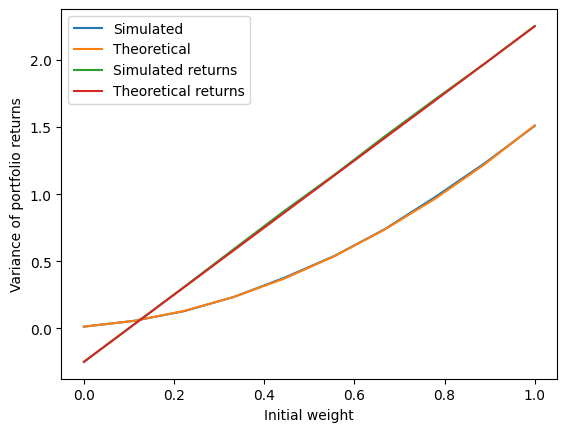

In [349]:
##############################################################################
# Simulation "Big Cap" pour vérifier la théorie de la variance du portefeuille
##############################################################################
import pandas as pd
import numpy as np

n_bigcap = 5
w_values = np.linspace(0, 1, 10)
w = 0.1
x = 0.05
y = 0.1
ppc = 0.6
ph = 0.5
rh = 1
rb = -6

returns_sim = []
variances_sim = []
returns_theo = []
variances_theo = []
# Simulation de 10 000 portefeuilles
for x in w_values:

    n_simulations = 10000
    results = [simulate_portfolio(n_bigcap=n_bigcap, w=w, x=x, probas_pred=[ppc, (1 - ppc)], probas_hausse=[ph, (1 - ph)]) for _ in range(n_simulations)]

    # Conversion des résultats en DataFrame
    df = pd.DataFrame(results, columns=['Rendement', 'Poids'])

    returns_sim.append(df['Poids'].mean() - (n_bigcap * w))
    E_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_x_total = E_x_ajustement * n_bigcap
    returns_theo.append(E_x_total)

    df['Poids Adjusted'] = df['Poids'] - (n_bigcap * w)
    variances_sim.append(df['Poids Adjusted'].var())
    #variances_theo.append((ph * ppc * (x - E_x_ajustement)**2 + (1 - ph) * (1 - ppc) * (x - E_x_ajustement)**2 + ph * (1 - ppc) * (-y - E_x_ajustement)**2 + (1 - ph) * ppc * (-y - E_x_ajustement)**2) * n_bigcap)

    variances_theo.append(((ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_x_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_x_ajustement)**2) * n_bigcap)




# Plot the variances as a function of w
plt.plot(w_values, variances_sim, label='Simulated')
plt.plot(w_values, variances_theo, label='Theoretical')
plt.plot(w_values, returns_sim, label='Simulated returns')
plt.plot(w_values, returns_theo, label='Theoretical returns')

plt.xlabel('Initial weight')
plt.ylabel('Variance of portfolio returns')
plt.legend()
plt.show()




## 4. Simulation

Maintenant qu'on a détaillé la méthode pour calculer l'espérance pour chaque sous parties, on peut simuler $n$ indices et portefeuilles pour déterminer la moyenne des rendements qu'on est sensés obtenir. 

Voici un module de simulation : 

In [261]:
#########################################################
# Module de simulation 
#########################################################

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Définition des paramètres initiaux

# Paramètre de l'univers

ppc = 0.6
ph = 0.5
rh = 1
rb = -2

# Paramètres de l'indice

N_indice = 100
n_bigcap = 5
w_bigcap = 0.1
n_smallcap_indice = N_indice - n_bigcap
exposition_smallcap_indice = n_bigcap * w_bigcap
w_smallcap_indice = exposition_smallcap_indice/1/n_smallcap_indice

# Paramètres du portefeuille

N_ptf = 30
n_smallcap_ptf = N_ptf - n_bigcap
x = 0.05
y = 0.1

# Génération aléatoire des rendements des actions
returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])

# Calcul du momentum des actions
actions_momentum = np.where(returns == rh, 1, 0)

# Définition des probabilités de prédiction
probas = [ppc, (1 - ppc)]  # 60% de chances de prédire correctement, 40% de chances de prédire l'autre

# Prédiction du momentum des actions
actions_momentum_pred = np.where(actions_momentum == 1, 
                                 np.random.choice([1, 0], size=N_indice, p=probas), 
                                 np.random.choice([0, 1], size=N_indice, p=probas))

#On créer une identité à chaque action pour pouvoir les identifier leur rendement et leur momentum
actions = np.arange(N_indice)


df_bigcap_indice = pd.DataFrame({'Actions':actions[:n_bigcap],'Returns':returns[:n_bigcap],'Momentum':actions_momentum[:n_bigcap],'Momentum_pred':actions_momentum_pred[:n_bigcap], 'Poids':w_bigcap})

df_smallcap_indice = pd.DataFrame({'Actions':actions[n_bigcap:],'Returns':returns[n_bigcap:],'Momentum':actions_momentum[n_bigcap:],'Momentum_pred':actions_momentum_pred[n_bigcap:], 'Poids':w_smallcap_indice})

df_indice = pd.concat([df_bigcap_indice, df_smallcap_indice])

return_indice = np.sum(df_indice['Returns'] * df_indice['Poids'])


df_bigcap_ptf = df_bigcap_indice.copy().assign(Poids = lambda df: df["Poids"] + df["Momentum_pred"].map({1: x, 0: -y}))

df_smallcap_ptf = df_smallcap_indice.sort_values(by='Momentum_pred',ascending=False).head(n_smallcap_ptf).assign(Poids = (1 - df_bigcap_ptf['Poids'].sum())/1/n_smallcap_ptf)

df_ptf = pd.concat([df_bigcap_ptf, df_smallcap_ptf])

return_ptf = np.sum(df_ptf['Returns'] * df_ptf['Poids'])


delta_return = return_ptf - return_indice 

In [366]:
#Création de la fonction de calcul d'espérance
def portfolio(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1, indice = False):
    
    n_smallcap_ptf = N_ptf - n_bigcap

    # Espérance des Small Cap
    E_X_sc_adjusted = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]
    
    # Espérance des Big Cap 
    E_X_bc_total = smallcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]

    # Espérance de l'ajustement
    E_x_ajustement = ajustement(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[0]
    
    # Espérance du portefeuille
    E_r_ptf = E_X_sc_adjusted + E_X_bc_total
    E_X_sc_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement)) + E_X_bc_total

    # Variance du small cap
    Var_r_sc_adjusted = smallcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]

    # Variance du small cap indice
    Var_r_sc_adjusted_indice = smallcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[2]

    # Variance du big cap
    Var_X_bc_total = bigcap(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]

    # Variance de l'ajustement
    Var_x_ajustement = ajustement(ppc=ppc, ph=ph, rh=rh, rb=rb, N_indice=N_indice, n_bigcap=n_bigcap, w_bigcap=w_bigcap, N_ptf=N_ptf, x=x, y=y)[1]


    if indice == False:
        # Variance du portefeuille
        Var_r_ptf = Var_r_sc_adjusted + Var_X_bc_total


    if indice == True:
        Var_r_ptf = Var_r_sc_adjusted_indice + Var_X_bc_total




    return E_r_ptf, Var_r_ptf

def bigcap(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Big Cap 
    E_X_bc_correct = ph * (ppc * (w_bigcap + x) + (1 - ppc) * (w_bigcap - y)) * rh  # Correct prediction outcomes
    E_X_bc_incorrect = (1 - ph) * (ppc * (w_bigcap - y) + (1 - ppc) * (w_bigcap + x)) * rb  # Incorrect prediction outcomes
    E_X_bc = (E_X_bc_correct + E_X_bc_incorrect)
    E_X_bc_total = E_X_bc * n_bigcap
    

    # Variance des Big Cap
    Var_X_bc = (ph * (rh)**2 * (ppc * (w_bigcap + x)**2 + (1 - ppc) * (w_bigcap - y)**2) + (1 - ph) * (rb)**2 * (ppc * (w_bigcap - y)**2 + (1 - ppc) * (w_bigcap + x)**2)) - E_X_bc**2
    Var_X_bc_total = Var_X_bc * n_bigcap

    return E_X_bc_total, Var_X_bc_total

def smallcap(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance des Small Cap
    E_X_sc_correct = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * rh
    E_X_sc_incorrect = (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * rb 
    E_X_sc_total = (E_X_sc_correct + E_X_sc_incorrect) #* 1/n_smallcap_ptf * n_smallcap_ptf

    # Espérance de l'ajustement
    E_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_x_total = E_x_ajustement * n_bigcap
    E_r_sc_adjusted = E_X_sc_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))

    # Variance des Small Cap
    Var_X_sc = ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) * ((rh - E_X_sc_total) ** 2) + (1 - ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc)))) * ((rb - E_X_sc_total) ** 2)
    Var_X_sc_total = Var_X_sc / N_ptf

    # Variance de l'ajustement
    Var_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_x_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_x_ajustement)**2
    Var_x_ajustement_total = Var_x_ajustement * n_bigcap

    Var_r_sc_adjusted = Var_X_sc_total * (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 + (Var_x_ajustement * n_bigcap ** 2 * E_X_sc_total**2)
    Var_r_sc_adjusted_indice = Var_X_sc_total * (1 - n_bigcap * w_bigcap)
    return E_r_sc_adjusted, Var_r_sc_adjusted, Var_r_sc_adjusted_indice

def ajustement(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05, y=0.1):
    # Espérance de l'ajustement
    E_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * x - (ph * (1 - ppc) + (1 - ph) * ppc) * y
    E_x_total = E_x_ajustement * n_bigcap

    # Variance de l'ajustement
    Var_x_ajustement = (ph * ppc + (1 - ph) * (1 - ppc)) * (x - E_x_ajustement)**2 + (ph * (1 - ppc) + (1 - ph) * ppc) * (-y - E_x_ajustement)**2
    Var_x_ajustement_total = Var_x_ajustement * n_bigcap
    return E_x_ajustement, E_x_total, Var_x_ajustement, Var_x_ajustement_total


#Création de la fonction de simulation
def simulate_portfolio(ppc=0.6, ph=0.5, rh=1, rb=-2, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05,y=0.1):
    n_smallcap_indice = N_indice - n_bigcap
    exposition_smallcap_indice = n_bigcap * w_bigcap
    w_smallcap_indice = exposition_smallcap_indice/1/n_smallcap_indice
    n_smallcap_ptf = N_ptf - n_bigcap

    returns = np.random.choice([rh, rb], size=(N_indice,), p=[ph, (1 - ph)])
    actions_momentum = np.where(returns == rh, 1, 0)
    probas = [ppc, (1 - ppc)]
    actions_momentum_pred = np.where(actions_momentum == 1, 
                                     np.random.choice([1, 0], size=N_indice, p=probas), 
                                     np.random.choice([0, 1], size=N_indice, p=probas))
    actions = np.arange(N_indice)

    df_bigcap_indice = pd.DataFrame({'Actions':actions[:n_bigcap],'Returns':returns[:n_bigcap],'Momentum':actions_momentum[:n_bigcap],'Momentum_pred':actions_momentum_pred[:n_bigcap], 'Poids':w_bigcap})
    df_smallcap_indice = pd.DataFrame({'Actions':actions[n_bigcap:],'Returns':returns[n_bigcap:],'Momentum':actions_momentum[n_bigcap:],'Momentum_pred':actions_momentum_pred[n_bigcap:], 'Poids':w_smallcap_indice})
    df_indice = pd.concat([df_bigcap_indice, df_smallcap_indice])
    return_indice = np.sum(df_indice['Returns'] * df_indice['Poids'])

    df_bigcap_ptf = df_bigcap_indice.copy().assign(Poids = lambda df: df["Poids"] + df["Momentum_pred"].map({1: x, 0: -y}))
    df_smallcap_ptf = df_smallcap_indice.sort_values(by='Momentum_pred',ascending=False).head(n_smallcap_ptf).assign(Poids = (1 - df_bigcap_ptf['Poids'].sum())/1/n_smallcap_ptf)
    df_ptf = pd.concat([df_bigcap_ptf, df_smallcap_ptf])
    return_ptf = np.sum(df_ptf['Returns'] * df_ptf['Poids'])

    delta_return = return_ptf - return_indice 

    # Finding a problem with the weights


    return_bigcap_ptf = np.sum(df_bigcap_ptf['Returns'] * df_bigcap_ptf['Poids'])
    return_smallcap_ptf = np.sum(df_smallcap_ptf['Returns'] * df_smallcap_ptf['Poids'])
    E_x_total = df_bigcap_ptf['Poids'].sum() - n_bigcap * w_bigcap

    return return_indice, return_ptf, delta_return, return_bigcap_ptf, return_smallcap_ptf, E_x_total




In [357]:
ajustement()[2]

0.0056250000000000015

In [369]:
ppc=0.6
ph=0.5
rh=1
rb=-2

N_indice=100
n_bigcap=5
w_bigcap=0.05
N_ptf=30

x=0.05
y=0.1

n_simulations = 10000
results = [simulate_portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y) for _ in range(n_simulations)]

# Conversion des résultats en DataFrame
df = pd.DataFrame(results, columns=['Rendement Indice', 'Rendement Portefeuille','Poids','BigCap','SmallCap','E_x_total'])

# Affichage des résultats
print("\nMoyenne de rendement de l'indice : ", round(df['Rendement Indice'].mean(), 5))
print("Espérance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0, indice = True)[0], 5))

print("\nMoyenne de rendement du portefeuille : ", round(df['Rendement Portefeuille'].mean(), 5))
print("Espérance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de delta entre l'indice et le portefeuille : ", round(df['Poids'].mean(), 5))
print("Espérance de delta entre l'indice et le portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0] - portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[0], 5))

print("\nMoyenne de rendement du big cap : ", round(df['BigCap'].mean(), 5))
print("Espérance de rendement du big cap : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne de rendement du small cap : ", round(df['SmallCap'].mean(), 5))
print("Espérance de rendement du small cap : ", round(smallcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[0], 5))

print("\nMoyenne d'ajustement de la simulation : ", round(df['E_x_total'].mean(), 5))
print("Espérance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 10))

print("\nMoyenne de variance de l'indice : ", round(df['Rendement Indice'].var(), 5))
print("Variance de rendement de l'indice : ", round(portfolio(ppc = 0.5, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = 0, y = 0)[1], 5))

print("\nMoyenne de variance du portefeuille : ", round(df['Rendement Portefeuille'].var(), 5))
print("Variance de rendement du portefeuille : ", round(portfolio(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y, indice = True)[1], 5))

print("\nMoyenne de variance du big cap : ", round(df['BigCap'].var(), 5))
print("Variance de rendement du big cap : ", round(bigcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance du small cap : ", round(df['SmallCap'].var(), 5))
print("Variance de rendement du small cap : ", round(smallcap(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[1], 5))

print("\nMoyenne de variance d'ajustement : ", round(df['E_x_total'].var(), 5))
print("Variance d'ajustement : ", round(ajustement(ppc = ppc, ph = ph, rh = rh, rb = rb, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x, y = y)[3], 5))







Moyenne de rendement de l'indice :  -0.24728
Espérance de rendement de l'indice :  -0.5

Moyenne de rendement du portefeuille :  -0.12109
Espérance de rendement du portefeuille :  -0.125

Moyenne de delta entre l'indice et le portefeuille :  0.1262
Espérance de delta entre l'indice et le portefeuille :  0.375

Moyenne de rendement du big cap :  0.05387
Espérance de rendement du big cap :  0.05

Moyenne de rendement du small cap :  -0.17496
Espérance de rendement du small cap :  -0.175

Moyenne d'ajustement de la simulation :  -0.12377
Espérance d'ajustement :  -0.125

Moyenne de variance de l'indice :  0.02963
Variance de rendement de l'indice :  0.07031

Moyenne de variance du portefeuille :  0.13674
Variance de rendement du portefeuille :  0.126

Moyenne de variance du big cap :  0.07251
Variance de rendement du big cap :  0.072

Moyenne de variance du small cap :  0.06927
Variance de rendement du small cap :  0.06075

Moyenne de variance d'ajustement :  0.02838
Variance d'ajustemen

In [ ]:
#Création de la fonction de calcul d'espérance
def esperance_portfolio_print(ppc=0.6, ph=0.5, N_indice=100, n_bigcap=5, w_bigcap=0.1, N_ptf=30, x=0.05):
    E_r_sc = (2 * ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) - 1) * 1/n_smallcap_ptf * n_smallcap_ptf
    V_r_sc = (ppc * (1 - (2 * ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) - 1))**2 + (1 - ppc) * (-1 - (2 * ((ph * ppc)/(ph * ppc + (1 - ph) * (1 - ppc))) - 1))**2) / n_smallcap_ptf
    print("E_r_sc : ", E_r_sc)
    print("V_r_sc : ", V_r_sc)

    E_r_bc = ((2 * ph - 1) * w_bigcap + (2 * ppc - 1) * x) * n_bigcap
    V_r_bc = (w_bigcap**2 + x**2) * n_bigcap * (2 * ph * (1 - ph) + 2 * ppc * (1 - ppc))
    print("E_r_bc : ", E_r_bc)
    print("V_r_bc : ", V_r_bc)
    
    E_x_ajustement = ((ph * ppc - ph * (1 - ppc)) + ((1 - ph) * (1 - ppc) - (1 - ph) * ppc)) * x
    V_x_ajustement = x**2 * (2 * ph * (1 - ph) + 2 * ppc * (1 - ppc))
    print("E_x_ajustement : ", E_x_ajustement)
    print("V_x_ajustement : ", V_x_ajustement)

    E_x_total = E_x_ajustement * n_bigcap
    V_x_total = x**2 * n_bigcap * (2 * ph * (1 - ph) + 2 * ppc * (1 - ppc))
    print("E_x_total : ", E_x_total)
    print("V_x_total : ", V_x_total)

    E_r_ptf = E_r_sc * (1 - n_bigcap * (w_bigcap + E_x_ajustement)) + E_r_bc
    V_r_ptf = (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 * V_r_sc + V_r_bc + (n_bigcap * V_x_ajustement)
    V_r_ptf1 = V_r_sc * (1 - n_bigcap * (w_bigcap + E_x_ajustement))**2 + V_r_bc + V_x_ajustement * (n_bigcap * E_r_sc)**2
    print("E_r_ptf : ", E_r_ptf)
    print("V_r_ptf : ", V_r_ptf)
    print("V_r_ptf1 : ", V_r_ptf1)

    E_r_sc_weighted = E_r_sc * (1 - n_bigcap * (w_bigcap + E_x_ajustement))
    
    print("Exposition Small Cap : ", 1 - n_bigcap * (w_bigcap + E_x_total))
    print("E_r_sc_weighted : ", E_r_sc_weighted)


In [ ]:
esperance_portfolio_print(ppc = ppc, ph = ph, N_indice = N_indice, n_bigcap = n_bigcap, w_bigcap = w_bigcap, N_ptf = N_ptf, x = x)

E_r_sc :  0.8
V_r_sc :  0.012413793103448274
E_r_bc :  0.04000000000000001
V_r_bc :  0.1717
E_x_ajustement :  0.0
V_x_ajustement :  0.0017000000000000001
E_x_total :  0.0
V_x_total :  0.0017000000000000001
E_r_ptf :  0.44000000000000006
V_r_ptf :  0.17650344827586206
V_r_ptf1 :  0.17589144827586206
1
0.5
0.0
Exposition Small Cap :  0.5
E_r_sc_weighted :  0.4


In [ ]:
df['SmallCap'].var()

0.00470359675158955